In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/3y_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:37]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8720829732065687
[[759  98]
 [ 50 250]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       857
           1       0.72      0.83      0.77       300

    accuracy                           0.87      1157
   macro avg       0.83      0.86      0.84      1157
weighted avg       0.88      0.87      0.87      1157



In [7]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8928262748487468
[[811  46]
 [ 78 222]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       857
           1       0.83      0.74      0.78       300

    accuracy                           0.89      1157
   macro avg       0.87      0.84      0.86      1157
weighted avg       0.89      0.89      0.89      1157



In [8]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8954191875540191
[[806  51]
 [ 70 230]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       857
           1       0.82      0.77      0.79       300

    accuracy                           0.90      1157
   macro avg       0.87      0.85      0.86      1157
weighted avg       0.89      0.90      0.89      1157



In [9]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8772687986171133
[[777  80]
 [ 62 238]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       857
           1       0.75      0.79      0.77       300

    accuracy                           0.88      1157
   macro avg       0.84      0.85      0.84      1157
weighted avg       0.88      0.88      0.88      1157



In [10]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9031979256698358
[[829  28]
 [ 84 216]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       857
           1       0.89      0.72      0.79       300

    accuracy                           0.90      1157
   macro avg       0.90      0.84      0.87      1157
weighted avg       0.90      0.90      0.90      1157



In [11]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9040622299049266
[[819  38]
 [ 73 227]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       857
           1       0.86      0.76      0.80       300

    accuracy                           0.90      1157
   macro avg       0.89      0.86      0.87      1157
weighted avg       0.90      0.90      0.90      1157



In [12]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8504753673293
[[778  79]
 [ 94 206]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       857
           1       0.72      0.69      0.70       300

    accuracy                           0.85      1157
   macro avg       0.81      0.80      0.80      1157
weighted avg       0.85      0.85      0.85      1157



In [13]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9075194468452895
[[820  37]
 [ 70 230]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       857
           1       0.86      0.77      0.81       300

    accuracy                           0.91      1157
   macro avg       0.89      0.86      0.88      1157
weighted avg       0.91      0.91      0.91      1157



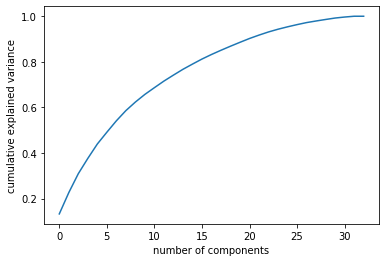

In [14]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [16]:
pca.n_components_

16

In [17]:
pca.explained_variance_ratio_

array([0.13267141, 0.09357101, 0.08301431, 0.06706074, 0.06314307,
       0.0516149 , 0.05009536, 0.04473173, 0.03764326, 0.03361064,
       0.02949153, 0.02886158, 0.02620864, 0.02545895, 0.02285156,
       0.02213878])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.13267141, 0.22624243, 0.30925674, 0.37631748, 0.43946055,
       0.49107545, 0.54117081, 0.58590254, 0.6235458 , 0.65715644,
       0.68664797, 0.71550955, 0.74171819, 0.76717715, 0.7900287 ,
       0.81216748])

In [19]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [20]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.881590319792567
[[766  91]
 [ 46 254]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       857
           1       0.74      0.85      0.79       300

    accuracy                           0.88      1157
   macro avg       0.84      0.87      0.85      1157
weighted avg       0.89      0.88      0.88      1157



In [21]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8409680207433017
[[724 133]
 [ 51 249]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       857
           1       0.65      0.83      0.73       300

    accuracy                           0.84      1157
   macro avg       0.79      0.84      0.81      1157
weighted avg       0.86      0.84      0.85      1157



In [22]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.881590319792567
[[758  99]
 [ 38 262]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       857
           1       0.73      0.87      0.79       300

    accuracy                           0.88      1157
   macro avg       0.84      0.88      0.85      1157
weighted avg       0.89      0.88      0.88      1157



In [23]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8470181503889369
[[749 108]
 [ 69 231]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       857
           1       0.68      0.77      0.72       300

    accuracy                           0.85      1157
   macro avg       0.80      0.82      0.81      1157
weighted avg       0.85      0.85      0.85      1157



In [24]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7675021607605877
[[616 241]
 [ 28 272]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       857
           1       0.53      0.91      0.67       300

    accuracy                           0.77      1157
   macro avg       0.74      0.81      0.74      1157
weighted avg       0.85      0.77      0.78      1157



In [25]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7536732929991357
[[601 256]
 [ 29 271]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       857
           1       0.51      0.90      0.66       300

    accuracy                           0.75      1157
   macro avg       0.73      0.80      0.73      1157
weighted avg       0.84      0.75      0.77      1157



In [26]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7796024200518582
[[716 141]
 [114 186]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       857
           1       0.57      0.62      0.59       300

    accuracy                           0.78      1157
   macro avg       0.72      0.73      0.72      1157
weighted avg       0.79      0.78      0.78      1157



In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8971477960242005
[[777  80]
 [ 39 261]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       857
           1       0.77      0.87      0.81       300

    accuracy                           0.90      1157
   macro avg       0.86      0.89      0.87      1157
weighted avg       0.90      0.90      0.90      1157

